**The Popularity of Netflix Shows, Their IMDb Rating & Genre**

In this project, the daily top 10 shows of Netflix in US is analysed. The aim of the project is to investigate the relationship between the popularity of a Netflix show (as evidenced by its appearance in the daily top 10) and their IMDb rating and genre. The project consists of data cleaning and combination and analysis using 3 plots. The main dataset is 'netflix daily top 10.csv' [1]. Two additional datasets are used, 'title.ratings.tsv' contains the rating, and 'title.basics.tsv' contains information about the genre and corresponding title of the series [2].


In [1]:
# Pandas, numpy, matplotlib.pyplot are imported for later use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the main dataset 'netflix daily top 10.csv'
dfmain = pd.read_csv('netflix daily top 10.csv')
dfmain.head() # Print the first 5 rows of the main dataset

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [3]:
  # Read the first additional dataset 'title.basics.tsv'
  # '\t' used as the separator as the file is a tsv
  dfbasic = pd.read_csv('title.basics.tsv',sep='\t')
  dfbasic.head() # Print the first 5 rows of the first additional dataset

C:\Users\Frank He\AppData\Local\Temp\ipykernel_6868\2782372779.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dfbasic = pd.read_csv('title.basics.tsv',sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
  # Read the second additional dataset 'title.ratings.tsv'
  # '\t' used as the separator as the file is tsv
  dfrating = pd.read_csv('title.ratings.tsv',sep='\t')
  dfrating.head() # Print the first 5 rows of the second additional dataset

,tconst,averageRating,numVotes
0,tt0000001,5.7,2037
1,tt0000002,5.7,272
2,tt0000003,6.5,1990
3,tt0000004,5.4,178
4,tt0000005,6.2,2747


For the main dataset, 'Title' and 'Days in Top 10' are the 2 most important columns that will be used in analysis. 'Title' column involves string data - Title of the serie. 'Days in Top 10' contains integer data - number of days this serie has been in the top 10 for Netflix in US,while 'Netflix Release Date' shows the release date of that Netflix show which is in the top 10, in Month Day, Year format. For 'title.basics.tsv' dataset, 'tconst', 'primaryTitle','genres' are the most important columns. In these 2 additional dataset each series is stored in a unique code 'tconst', this is a string data which will later be used to combine the 2 additional datasets. 'primaryTitle' contains string data which is the actual title of each serie. 'genres' is also string data showing the genre of the serie. Finally, for 'title.ratings.tsv' dataset, all 3 columns are important. 'tconst' is the string data for the code of the series. 'averageRating' is the average IDBm rating audiences gave to the serie, it's a float data and we'll use it for analysis later. 'numVotes' contains integer data, that is the number of audiences that goave a rating for that series. These columns that considered as important are used in cleaning, getting rid of the rows having empty cells or NaN.

In [5]:
  # Remove rows with empty cells and NaN values in 'Days In Top 10' or 'Title' columns from dfmain
  dfmain.dropna(subset = ['Days In Top 10','Title'], inplace=True)

  # Remove rows with empty cells and NaN values in 'tconst', 'primaryTitle' or 'genres' columns from dfbasic
  dfbasic.dropna(subset = ['tconst', 'primaryTitle','genres'], inplace=True)

  # Remove rows with empty cells and NaN values from dfrating
  dfrating.dropna(inplace=True)

  # Print the number of rows in the 3 dataframes respectively
  print(len(dfmain))
  print(len(dfbasic))
  print(len(dfrating))

7100
10841759
1418972


As the top 10 series for each day is recorded in the main dataset, it resulted in many series title being repeated in the data if they were within the top 10 for many days. For the purpose of this project, only the total number of days the serie stayed in top 10 need to be known. Hence, the main datafram was sorted in descending order by 'Days In Top 10', then the duplicated titles are removed, leaving only the row with highest number of days the serie has been in top 10.

In [6]:
  # Sort the main DataFrame by 'Days In Top 10' column in descending order
  dfmain_sorted = dfmain.sort_values(by='Days In Top 10', ascending=False)

  # Remove duplicates in the 'Title' column, keeping the first occurrence (which has the highest 'Days In Top 10')
  dfmain_filtered = dfmain_sorted.drop_duplicates(subset='Title', keep='first')

  # Print the filtered DataFrame
  print(dfmain_filtered)

           As of  Rank Year to Date Rank Last Week Rank  \
6998  2022-03-01     9                 -              -   
6996  2022-03-01     7                 7              8   
6678  2022-01-28     9                 7              5   
5347  2021-09-17     8                 7              6   
2809  2021-01-06    10                 9              6   
...          ...   ...               ...            ...   
429   2020-05-13    10                 -              -   
6739  2022-02-03    10                 -              -   
1689  2020-09-16    10                 -              -   
6673  2022-01-28     4                 -              -   
3988  2021-05-04     9                 -              -   

                               Title     Type Netflix Exclusive  \
6998                       Cocomelon  TV Show               NaN   
6996                           Ozark  TV Show               Yes   
6678                       Cobra Kai  TV Show               NaN   
5347                   

As stated previously, for the 2 additional datasets each series is stored as a unique code 'tconst'. This code is used to combine the 2 additional datasets as preparation for further combination with main dataset.

In [7]:
  # Combine (merge) the 2 additional dataframes based on their unique code 'tconst'
  # The 'inner' join will only include rows where the 'tconst' values present in both dataframes
  merged_dfadditional = pd.merge(dfbasic, dfrating, on='tconst', how='inner')

  # Print the merged DataFrame
  print(merged_dfadditional)

            tconst  titleType                primaryTitle  \
0        tt0000001      short                  Carmencita   
1        tt0000002      short      Le clown et ses chiens   
2        tt0000003      short              Pauvre Pierrot   
3        tt0000004      short                 Un bon bock   
4        tt0000005      short            Blacksmith Scene   
...            ...        ...                         ...   
1418964  tt9916730      movie                      6 Gunn   
1418965  tt9916766  tvEpisode              Episode #10.15   
1418966  tt9916778  tvEpisode                      Escape   
1418967  tt9916840  tvEpisode  Horrid Henry's Comic Caper   
1418968  tt9916880  tvEpisode   Horrid Henry Knows It All   

                      originalTitle isAdult startYear endYear runtimeMinutes  \
0                        Carmencita       0      1894      \N              1   
1            Le clown et ses chiens       0      1892      \N              5   
2                    Pauvre

Now for the main dataframe and merged addiitional dataframe, what they have in common is the title of the series. In main dataframe the column heading is 'Title' while in merged addiitional dataframe the column heading is 'primaryTitle'. These 2 dataframes are combined based on these 2 matching columns.

In [8]:
  # Combine filtered main dataframe and merged additional dataframe based on the 'Title' column in filtered main dataframe and 'primaryTitle' column in merged additional dataframe
  # The 'inner' join include only rows that 'Title' values in filtered main dataframe match the 'primaryTitle' in merged additional dataframe
  final_df = pd.merge(dfmain_filtered, merged_dfadditional, left_on='Title', right_on='primaryTitle', how='inner')

  # Print the final combined DataFrame
  print(final_df)


           As of  Rank Year to Date Rank Last Week Rank          Title  \
0     2022-03-01     9                 -              -      Cocomelon   
1     2022-03-01     7                 7              8          Ozark   
2     2022-01-28     9                 7              5      Cobra Kai   
3     2022-01-28     9                 7              5      Cobra Kai   
4     2022-01-28     9                 7              5      Cobra Kai   
...          ...   ...               ...            ...            ...   
3268  2022-01-28     4                 -              -         Chosen   
3269  2022-01-28     4                 -              -         Chosen   
3270  2021-05-04     9                 -              -  Your Highness   
3271  2021-05-04     9                 -              -  Your Highness   
3272  2021-05-04     9                 -              -  Your Highness   

         Type Netflix Exclusive Netflix Release Date  Days In Top 10  \
0     TV Show               NaN        

It is noticed that there are some duplications of the title name for the combined additional dataframe as some of the series somehow had multiple voting events. In this project, for each serie, only the voting event with the highest number of voting (numVotes) is considered. Therefore, for each serie the rows with lower 'numVotes' is dropped.

The dataframe with all replications removed is renamed 'df' and sorted in the order by number of days in top 10 for simplicity of further analysis.

In [9]:
  # Sort the final combined DataFrame by 'numVotes' column in descending order
  final_df_sorted = final_df.sort_values(by='numVotes', ascending=False)

  # Remove duplicates in the 'Title' column, keeping the row that have highest 'numVotes', rename as 'df' for simplicity in analysis
  df = final_df_sorted.drop_duplicates(subset='Title', keep='first')

  # Sort the DataFrame by 'Days In Top 10' column in descending order for further analysis
  df = df.sort_values(by='Days In Top 10', ascending=False)

  # Print the DataFrame
  print(df)

           As of  Rank Year to Date Rank Last Week Rank  \
0     2022-03-01     9                 -              -   
1     2022-03-01     7                 7              8   
6     2022-01-28     9                 7              5   
11    2021-09-17     8                 7              6   
12    2021-09-01     8                 9              6   
...          ...   ...               ...            ...   
3247  2022-01-28     4                 -              -   
3189  2021-03-03    10                 -              -   
3214  2020-06-12    10                 -              -   
3237  2020-05-13    10                 -              -   
3271  2021-05-04     9                 -              -   

                               Title     Type Netflix Exclusive  \
0                          Cocomelon  TV Show               NaN   
1                              Ozark  TV Show               Yes   
6                          Cobra Kai  TV Show               NaN   
11                     

Then, all the columns not going to be used in analysis are dropped. The important columns has been mentioned after importing the datasets. For simplicity of further analysis, the final cleaned and combined file is named 'df.csv'.

In [10]:
  # Drop the columns that will not be used in analysis
  df.drop(['originalTitle', 'isAdult','As of', 'Rank', 'Year to Date Rank', 'primaryTitle', 'Last Week Rank', 'Netflix Exclusive', 'tconst', 'titleType', 'startYear', 'endYear', 'runtimeMinutes', 'Viewership Score'], axis=1, inplace=True)

  # Print the DataFrame after dropping the columns
  print(df)

                               Title     Type Netflix Release Date  \
0                          Cocomelon  TV Show          Jun 1, 2020   
1                              Ozark  TV Show         Jul 21, 2017   
6                          Cobra Kai  TV Show         Aug 28, 2020   
11                          Manifest  TV Show         Jun 10, 2021   
12                       Outer Banks  TV Show         Apr 15, 2020   
...                              ...      ...                  ...   
3247                          Chosen  TV Show         Jan 27, 2022   
3189              Step Up Revolution    Movie          Mar 1, 2021   
3214                        Hannibal  TV Show          Jun 5, 2020   
3237  House at the End of the Street    Movie          May 8, 2013   
3271                   Your Highness    Movie          May 1, 2021   

      Days In Top 10                   genres  averageRating  numVotes  
0                428         Animation,Family            4.1      1066  
1            

In [11]:
  # Export the cleaned and combined dataset as a new csv file
  df.to_csv('df.csv', index=False)



---


Now we want to make some calculations on obtained data. Let's see how many people gave their rating to each movie on average, how they rate (mean value) and what is the standard deviation of it. To get this information, we use the following funcitons: min(), max(), mean(), std() Here is the function calculations(df), where df is the cleared and combined dataframe.

In [12]:
def calculations(df):
    #How many people gave a score to each film in average
    people_average = int(df['numVotes'].mean())
    print(f'On average, {people_average} people gave their opinion on each Netflix show')

    #Let's find movies with the highest and the lowest rating

    #Firstly we need to find maximum and minimum values in the 'averageRating' column
    min_rating = df['averageRating'].min()
    max_rating = df['averageRating'].max()

    #Now let's find their corresponding titles

    #Since the movies are sorted according to the number of days in top10, we assume that
    # if 2 or more movies have the same rating we choose the first one for the highest
    # and the last one for the lowest rating

    movie_with_max_rating = df[df['averageRating'] == max_rating]['Title'].iloc[0]
    movie_with_min_rating = df[df['averageRating'] == min_rating]['Title'].iloc[-1]

    print(f'The Netflix show with the highest rating of {max_rating} is "{movie_with_max_rating}"' )
    print(f'The Netflix show with the lowest rating of {min_rating} is "{movie_with_min_rating}"' )

    #Now let's find what score people usually give to the movie in top10
    mean_rating = round(df['averageRating'].mean(),3)
    print(f'People usually give {mean_rating} score to the Netflix shows in top 10')

    #Deviation from the mean value
    deviation_rating = round(df['averageRating'].std(),3)
    print(f'The standard deviation of the score is {deviation_rating}')

Let's call calculations() function and see the result:

In [13]:
calculations(df)

On average, 100181 people gave their opinion on each Netflix show
The Netflix show with the highest rating of 9.3 is "Avatar: The Last Airbender"
The Netflix show with the lowest rating of 1.9 is "Hype House"
People usually give 6.557 score to the Netflix shows in top 10
The standard deviation of the score is 1.148


Now we can visualise obtained data to see the average rating distribution by creating a histogram

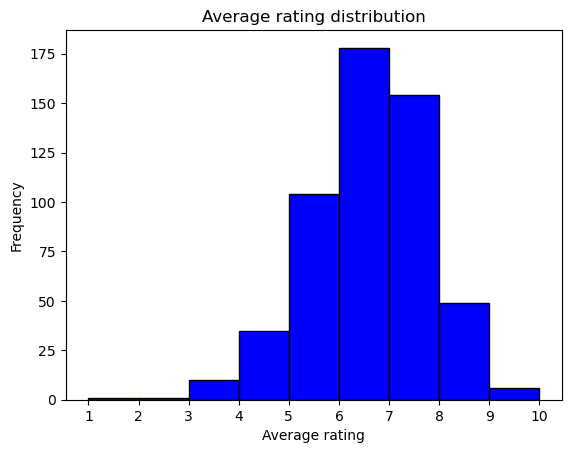

In [14]:
# Specifying bin edges
bin_edges = [1,2,3,4,5,6,7,8,9,10]

# Plot histogram
plt.hist(df['averageRating'], bins=bin_edges, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Average rating')
plt.ylabel('Frequency')
plt.title('Average rating distribution')
plt.xticks(range(1, 11))

# Show plot
plt.show()

We used a histogram here to analyse what rating people are most likely to give to a Netflix show that is in top 10. Histogram is good at identifying the pattern of data distribution on a numeric spectrum. For example, it magnifies what is the most probable value range and whether the data is skewed or centred. We used here histogram, not a bar chart, because we have only one category to analyse - the average rating.
This graph supports our calculations and clearly shows that people tend to rate top 10 movies from 5 to 8 points.


---



Scatter Plotting the correlation between the number of days a title remains in the top 10 and its IMDb rating.

The choice of (variables on the) x and y axes: The independent variable is usually placed along the x axis in a scatter plot whereas the variable that responds to changes is placed at the y axis. Since both factors (IMDb reviews and Days in top 10) are both non-constants it might be challenging to decide which variable should be place at which axis. However, the number of days the title stays in the top 10 seems to be more of a response or an outcome of the IMDb rating, which is why it is more appropriate to place the 'averageRating' column values at the x axis and the  'Days In Top 10' at the y axis.

The color of choice: The color of choice for the scatter plot was selected to be dark blue (DarkBlue) for its aesthetic appeal and convetion, since it seems to be common and consistant in appereance on scatter plots (and plots in general i.e. bar plots). In addition, the color is not aggressive and is easily visible against light backgrounds and does not neglect color-blind viewers, as dark blue is distinguishable even for those with color vision deficiencies.


Text(0.5, 1.0, 'Scatter Plot of Average Rating vs. Days In Top 10 (including outlier)')

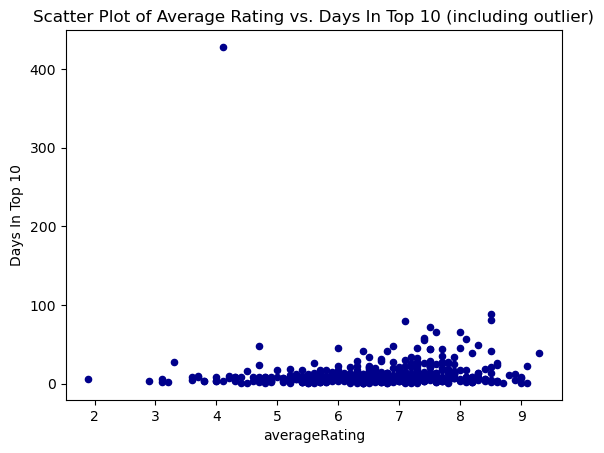

In [15]:
#Scatter Plot
#Scatter plotting the original cleaned data neglecting transparency
df.plot.scatter(x='averageRating',y='Days In Top 10', c='DarkBlue')
plt.title('Scatter Plot of Average Rating vs. Days In Top 10 (including outlier)')

From the figure above, it can be seen that one was in the top 10 for over 400 days, which is overwhelmingly more than the rest of the Netflix shows. This leads to the scatterplot grouping the rest of the Netflix shows (dots on the plot) in order to accommodate a point that is distant from the rest of the dots, resulting in a broader perspective cluttering the rest of the datapoints.

By reading through the first row final combined dataset, that Netflix show is Cocomelon, and it has been in the top 10 for 428 days. Through research, Cocomelon is a TV show targeting for kids, and is highly popular amongst children watching Netflix [3]. That means, the audiences rating Cocomelon are either children, or adults that aren't the "real" audience for the show. Therefore, the rating of Cocomelon is considered as an outlier by our group and gets removed from further analysis (2nd plot below). The children's rating may also explain why the average rating for Cocomelon is so low considering kids sometimes give random ratings based on their mood.

For the 2nd scatter plot below, the transparency of the data points was enhanced with the alpha = 0.5 command, setting the transparency of the points to 50%, reducing the overlap. The value by which the transparency is reduced can be modified as needed. Additionally, it is also possible to shrink the size of the data points with the s = 'value' command if necessary.

Comparison: The (original) scatter plot which neglects transaprency and ease of reading / understanding the plot can also be seen for comparison.

Text(0.5, 1.0, 'Scatter Plot of Average Rating vs. Days In Top 10 (excluding outlier)')

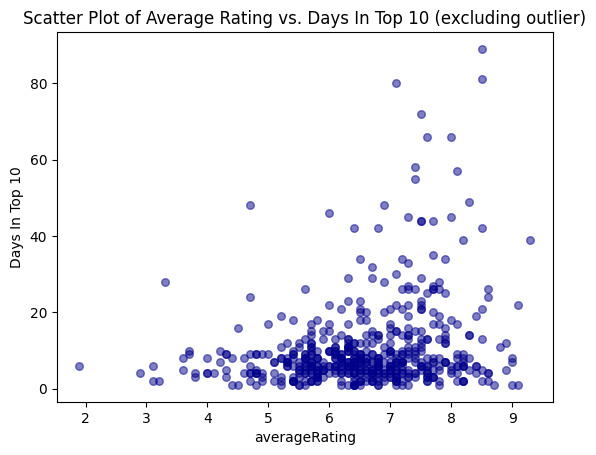

In [40]:
#Scatter plotting the filtered data with added transparency, and the outlier emitted
df_filtered = df[df['Days In Top 10'] != 428]
df_filtered.plot.scatter(x='averageRating',y='Days In Top 10', c='DarkBlue', s = 30, alpha = 0.5)
plt.title('Scatter Plot of Average Rating vs. Days In Top 10 (excluding outlier)')

From the new scatter plot above, a weak positive correlation can be observed between the average IMDb rating and the number of days in the top 10 for the Netflix show. Majority of the Netflix shows with over 50 days in the daily top 10 has rating above 7, which is above the average rating.



---


A bar graph was selected to show the genre distribution among the top 10 titles
on Netflix because it effectively illustrates categorical data.
The genres are placed along the x-axis, while the frequency of titles within each genre is measured along the y-axis. This arrangement allows viewers to easily compare the popularity of different genres at a glance.
The choice of orange for the bars was made to improve visual appeal and draw attention. Orange is a bright, attention catching color that stands out well against the white or black background of the chart, making it easy for viewers to differentiate between genres.

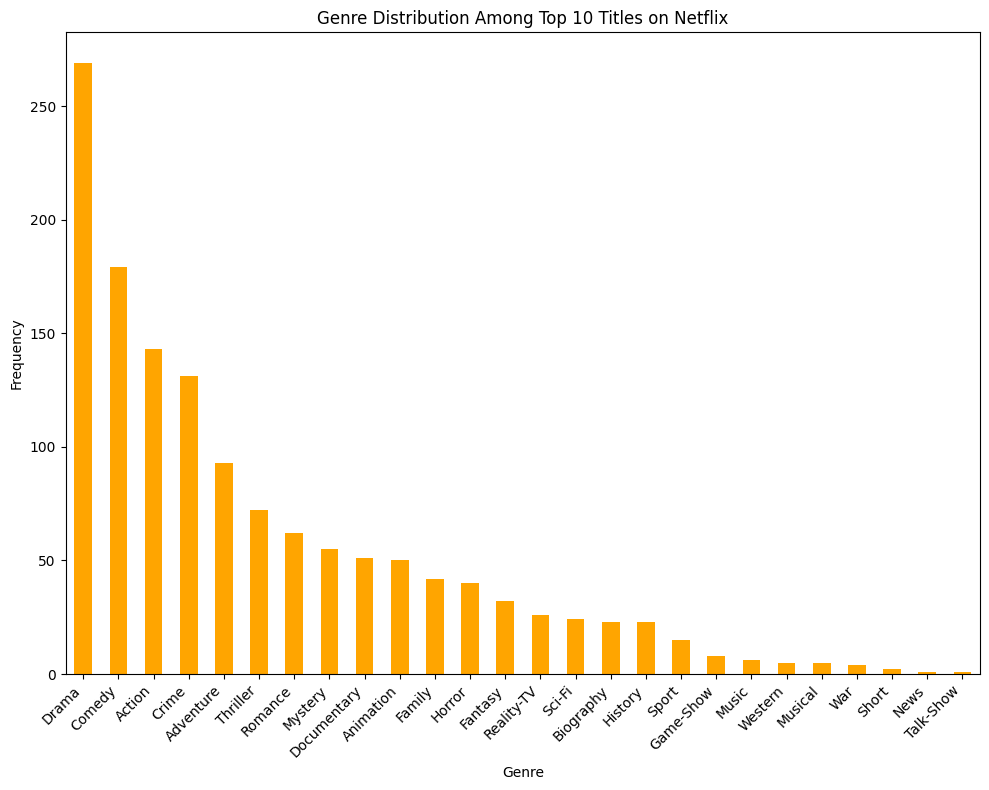

In [41]:
# Split the 'genres' column of the DataFrame by “," and expand it into separate columns
# Stack the DataFrame to create a single column of all genres
all_genres = df['genres'].str.split(',', expand=True).stack()

# Count the occurrences of each genre
genre_counts = all_genres.value_counts()

# Create a bar plot to visualise the genres distribution the top 10 titles on Netflix
fig, ax = plt.subplots(figsize=(10, 8))
genre_counts.plot(kind='bar', color='orange', ax=ax)
ax.set_title('Genre Distribution Among Top 10 Titles on Netflix')
ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.tight_layout() # Prevent overlapping elements

# Display the plot
plt.show()

From this bar plot, drama has the highest frequency being amongst the top 10 daily Netflix shows, followed by comedy and action. Having drama and comedy in the top 2 indicates that more audiences have a temptation to relax and laugh while watching Netflix. This is in contrast of some serious Netflix shows like wars and news, both having one of the lowest frequencies in the daily top 10.

Interestingly, this perfectly matches the survey result for Netflix audiences by University of Southern California in 2013 that 82.81% of the audiences watch Netflix for relaxation and fun purposes [4].

Apart from the 3 plots above, an additional stacked area graph was plotted purely for the interest our our group after the results of the genre distribution bar plot. A stacked area graph is selected to show time series plot of the number of Netflix shows in top 10 against month, and those Netflix shows are separated by genres. The highest point in each month is the total count of the Netflix shows that were in top in that particular month, the total count is placed along the Y-axis and the months are placed in the X-axis. A legend is used to show the genres that are stacked by area. a multicoloured approach is chosen to distinguish each genre.

<Figure size 1200x800 with 0 Axes>

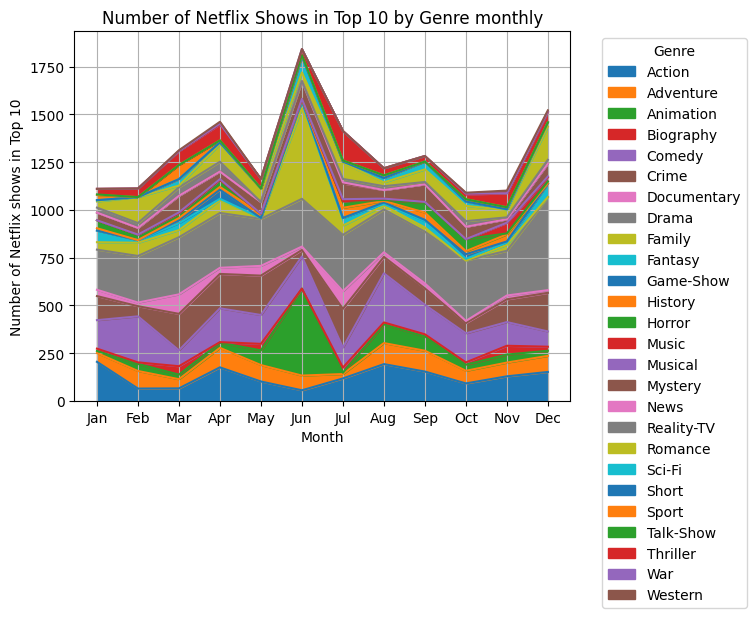

In [42]:
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])

# Extract month from 'Netflix Release Date'
df['Month'] = df['Netflix Release Date'].dt.month

# Split the 'genres' column into multiple genres
df['genres'] = df['genres'].str.split(',')

# Explode the 'genres' column to have one genre per row
df = df.explode('genres')

# Aggregate data by month and genre
genre_month_data = df.groupby(['Month', 'genres'])['Days In Top 10'].sum().unstack().fillna(0)

# Plot stacked area plot
plt.figure(figsize=(12, 8))
genre_month_data.plot(kind='area', stacked=True)
plt.title('Number of Netflix Shows in Top 10 by Genre monthly')
plt.xlabel('Month')
plt.ylabel('Number of Netflix shows in Top 10')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

From the stacked area plot, it can be seen that June has the greatest number of Netflix shows in top 10, followed by December. This is likely because June is the time when simmer holiday begins, and December has the Christmas holiday, resulting in large number of new Netflix shows being released on these 2 months. Due to the number of different genres in the dataset, the number of legend is somewhat over the limit of the number of colours in matplotlib, causing some colour overlap. Since this is only an additional plot for the team, solution to this issue is still being searched.

A number of interesting findings have been achieved through the analysis of Netflix data. Statistical wise, audiences tend to rate Netflix shows from 5 to 8, with an average of 6.557 with a standard deviation of 1.148. Across all of the Netflix shows that have been ranked in the daily top 10, "Avatar: The Last Airbender" managed to achieve the highest rating of 9.4, while "Hype House" has the lowest rating of 1.9. The histogram demonstrated that majority of the audiences tend to rate the Netflix shows that are in the top 10 between 5 to 8 points. From the scatter plot, a weak positive correlation can be observed between the average IMDb rating and the number of days in the top 10 for the Netflix show. An outlier, Cocomelon, is removed from the analysis as it's a Netflix show for kids. Finally, the bar plot indicated that more Netflix audience tend to watch Netflix shows for relaxation purposes (watching drama and comedy), matching the previous survey done by the University of Southern California. From the results of the bar plot, an additional stacked area graph was plotted for our group's interest, and it was found that June has the greatest number of Netflix shows in top 10, followed by December, which is likely due to the beginning of summer holiday in June and the Chritmas holiday in December.

Besides the large number of insights gained about Netflix shows, from this project, the most dominant feeling for all group members is the massive gap between theoretical knowledge and using those knowledge in actual applications. It seemed relatively straightforward to clean and merge the datasets followed by plotting on A+ exercises. However, when the actual datasets, especially the two additional datasets our group used come into play, all those process becomes much more difficult due to the complicated nature of these 2 datasets (also the first time the dataset comes as a tsv file). It is the first time for us to deal with multiple types of non-sense values along with repetitions. In plotting, it was difficult to select the plot type, some trials and researches were done before making the decision of using the histogram, scatter plot, and bar plot for the 3 figures of our project's purpose. The programming skill using matplotlib.pyplot is also greatly enhanced for all group members through the project. The experience from this project would be highly beneficial for future studies and work related to the applications of python programming.

Reference

[1] Kanawattanachai, P. (2022) Netflix Daily Top 10, Kaggle. Available at: https://www.kaggle.com/datasets/prasertk/netflix-daily-top-10-in-us (Accessed: 16 March 2024).

[2] IMDb data files download (2024) IMDb Data Files. Available at: https://datasets.imdbws.com/ (Accessed: 16 March 2024).

[3] Cocomelon Lane (2023) IMDb. Available at: https://www.imdb.com/title/tt15040002/ (Accessed: 20 March 2024).

[4] Survey report of Netflix (2013) University of Southern California. Available at: https://ariannagarcia.files.wordpress.com/2014/01/netflix-survey-report.pdf (Accessed: 19 March 2024).